# Projeto da Disciplina Ciência de Dados
# Fase de Entendimento dos Dados

## Relatório de Coleta, Descrição, Exploração e Avaliação da Qualidade dos Dados

### Principais Bibliotecas e Funções

In [45]:
import pandas as pd
import selenium
from selenium import webdriver
import matplotlib
from matplotlib import pyplot
import shutil 
import os
import zipfile
import numpy as np


#definindo algumas funções

#Move dados para ambiente de trabalho
def mov_dados_ambiente(arquivo):
    source = 'C:\\Users\\Emiliano\\Downloads\\'
    source = source+arquivo+'.zip'
    destination = os.path.abspath(os.getcwd())
    dest = shutil.move(source, destination)
    # Descompactando
    with zipfile.ZipFile(dest, 'r') as zip_ref:
        zip_ref.extractall(arquivo)
        
        
#Carrega os dados
def carrega_dados(microdados_ano, colunas):
    dados = pd.read_csv(os.getcwd()+'\\'+microdados_ano+'\\DADOS\\'+microdados_ano+'.csv',
    usecols=colunas, sep=';', encoding='latin-1')
    return dados


def plota_grafico_pizza(dados, coluna, rotulos, titulo, raio=0.7):
    x = dados[coluna].value_counts() / dados[coluna].count()
    pyplot.pie(x, explode=None, labels=rotulos, autopct='%1.1f%%', pctdistance=0.8, shadow=True, labeldistance=1.1, radius=raio, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0))
    pyplot.title(titulo)


#Calcula medias dos participantes
def calcula_medias(dados_ano):
    notas = dados_ano[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]
    return notas.T.mean() 


def cat_to_int(dados):
    dados_encoded = dados.copy()
    dados_cat = []
    colunas = dados.columns
    for coluna in colunas:
        dado_encoded, dado_cat = dados[coluna].factorize(sort=True)
        dados_encoded[coluna] = dado_encoded
        dados_cat.append(dado_cat)
    return dados_encoded, dados_cat


def cat_to_int(dados):
    dados_encoded = dados.copy()
    dados_cat = []
    colunas = dados.columns
    for coluna in colunas:
        dado_encoded, dado_cat = dados[coluna].factorize(sort=True)
        dados_encoded[coluna] = dado_encoded
        dados_cat.append(dado_cat)
    return dados_encoded, dados_cat


def faz_amostragem(dados):
    tamanho_amostra = int(0.1 * len(dados))
    dados_amostra = dados.sample(n=tamanho_amostra)
    return dados_amostra


def grafico_disperssao(dados, ano, titulo='Relação da Renda e Notas dos Participantes do MA no Enem', transparencia=0.3):
    pyplot.scatter(x=dados['Q006'], y=dados['NU_MEDIA'], c='green', alpha=transparencia)
    pyplot.yticks(np.arange(100, 800, 150))
    pyplot.xticks(np.arange(0, 18, 2))

    pyplot.title(f'{titulo}')
    pyplot.xlabel('Renda')
    pyplot.ylabel('Nota')

    pyplot.show()

    
def correlacoes(dados, atributo):
    corr_matrix = dados.corr()
    return corr_matrix[atributo].sort_values(ascending=False)


def correlacoes_ano(dados, colunas):
    encodes, cat = cat_to_int(dados[colunas])
    encodes['NU_MEDIA'] = dados['NU_MEDIA']
    return correlacoes(encodes, 'NU_MEDIA')


def agrupar_por_atributo(encodes, dados, atributo):
    encodes['TP_FAIXA_ETARIA'] = dados['TP_FAIXA_ETARIA']
    encodes['TP_DEPENDENCIA_ADM_ESC'] = dados['TP_DEPENDENCIA_ADM_ESC']
    encodes['NU_NOTA_REDACAO'] = dados['NU_NOTA_REDACAO']
    encodes['NU_MEDIA'] = dados['NU_MEDIA']
    encodes['NO_MUNICIPIO_ESC'] = dados['NO_MUNICIPIO_ESC']

    return encodes.groupby(atributo).mean(numeric_only=True)

### 1. Coleta dos Dados

In [2]:
driver = webdriver.Chrome()

driver.get('https://download.inep.gov.br/microdados/microdados_enem_2018.zip')
driver.get('https://download.inep.gov.br/microdados/microdados_enem_2019.zip')
driver.get('https://download.inep.gov.br/microdados/microdados_enem_2020.zip')
driver.get('https://download.inep.gov.br/microdados/microdados_enem_2021.zip')

In [2]:
# Movendo Microdados para ambiente de trabalho
microdados_enem_2018 = 'microdados_enem_2018'
microdados_enem_2019 = 'microdados_enem_2019'
microdados_enem_2020 = 'microdados_enem_2020'
microdados_enem_2021 = 'microdados_enem_2021'

mov_dados_ambiente(microdados_enem_2018)
mov_dados_ambiente(microdados_enem_2019)
mov_dados_ambiente(microdados_enem_2020)
mov_dados_ambiente(microdados_enem_2021)

'mov_dados_ambiente(microdados_enem_2018)\nmov_dados_ambiente(microdados_enem_2019)\nmov_dados_ambiente(microdados_enem_2020)\nmov_dados_ambiente(microdados_enem_2021)'

In [3]:
colunas = ['TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TP_LINGUA', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',
       'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
       'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025']
dados_enem_2018 = carrega_dados(microdados_enem_2018, colunas)
dados_enem_2019 = carrega_dados(microdados_enem_2019, colunas)
dados_enem_2020 = carrega_dados(microdados_enem_2020, colunas)
dados_enem_2021 = carrega_dados(microdados_enem_2021, colunas)

### 2. Descrição dos Dados

#### 2.1 Microdados Enem 2018

In [4]:
dados_enem_2018 = dados_enem_2018[dados_enem_2018.SG_UF_ESC=="MA"]
dados_enem_2018.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
81,3,M,0.0,2,0,1,1.0,2112209.0,Timon,21.0,...,A,A,A,B,B,A,B,A,B,B
130,6,M,0.0,3,0,2,3.0,2111300.0,São Luís,21.0,...,A,A,A,B,A,A,D,A,A,B
408,2,F,0.0,3,0,1,1.0,2111607.0,São Raimundo das Mangabeiras,21.0,...,A,A,A,B,A,A,E,A,B,B
485,3,M,NaN,3,0,2,2.0,2103802.0,Dom Pedro,21.0,...,B,A,A,B,A,B,D,A,A,B
502,2,F,0.0,3,0,4,1.0,2114007.0,Zé Doca,21.0,...,A,A,A,B,A,A,B,A,A,A


In [5]:
dados_enem_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49890 entries, 81 to 5513620
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TP_FAIXA_ETARIA         49890 non-null  int64  
 1   TP_SEXO                 49890 non-null  object 
 2   TP_ESTADO_CIVIL         48712 non-null  float64
 3   TP_COR_RACA             49890 non-null  int64  
 4   TP_ANO_CONCLUIU         49890 non-null  int64  
 5   TP_ESCOLA               49890 non-null  int64  
 6   TP_ENSINO               49886 non-null  float64
 7   CO_MUNICIPIO_ESC        49890 non-null  float64
 8   NO_MUNICIPIO_ESC        49890 non-null  object 
 9   CO_UF_ESC               49890 non-null  float64
 10  SG_UF_ESC               49890 non-null  object 
 11  TP_DEPENDENCIA_ADM_ESC  49890 non-null  float64
 12  TP_LOCALIZACAO_ESC      49890 non-null  float64
 13  TP_SIT_FUNC_ESC         49890 non-null  float64
 14  CO_MUNICIPIO_PROVA      49890 non-n

In [6]:
dados_enem_2018[[ 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA','TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TP_LINGUA', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',
       'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
       'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025']].describe()

,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,...,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,49890.000000,48712.000000,49890.000000,49890.0,49890.000000,49886.000000,49890.000000,49890.000000,49890.000000,4.989000e+04,...,39859.000000,49890.000000,41558.000000,41558.000000,41558.000000,41558.000000,41558.000000,41558.000000,41558.000000,49890.000000
mean,3.091020,0.017778,2.490860,0.0,2.135638,1.113038,2.135658,1.085909,1.013129,2.111114e+06,...,497.425322,0.607136,1.163362,115.033447,87.971991,83.499206,112.631503,62.126666,461.262813,4.577029
std,1.899854,0.147280,0.868032,0.0,0.633493,0.458907,0.633568,0.280232,0.169800,1.017344e+05,...,84.159690,0.488392,0.850835,33.628747,49.607764,46.429703,36.034123,48.609425,185.162402,1.618649
min,1.000000,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.302603e+06,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,2.000000,0.0,2.000000,1.000000,2.000000,1.000000,1.000000,2.103505e+06,...,436.200000,0.000000,1.000000,100.000000,40.000000,40.000000,100.000000,40.000000,340.000000,4.000000
50%,3.000000,0.000000,3.000000,0.0,2.000000,1.000000,2.000000,1.000000,1.000000,2.108504e+06,...,481.500000,1.000000,1.000000,120.000000,100.000000,80.000000,120.000000,40.000000,440.000000,4.000000
75%,3.000000,0.000000,3.000000,0.0,2.000000,1.000000,2.000000,1.000000,1.000000,2.111300e+06,...,542.000000,1.000000,1.000000,140.000000,120.000000,120.000000,120.000000,100.000000,580.000000,5.000000
max,20.000000,3.000000,5.000000,0.0,4.000000,3.000000,4.000000,2.000000,4.000000,5.300108e+06,...,987.900000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,980.000000,20.000000


#### 2.2 Microdados Enem 2019

In [7]:
dados_enem_2019 = dados_enem_2019[dados_enem_2019.SG_UF_ESC=="MA"]
dados_enem_2019.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
448,2,M,1,3,0,2,1.0,2111300.0,São Luís,21.0,...,B,A,A,C,A,A,D,B,B,B
590,3,F,3,3,0,2,1.0,2103802.0,Dom Pedro,21.0,...,A,A,A,B,A,A,B,A,A,A
653,3,F,1,2,0,2,1.0,2103000.0,Caxias,21.0,...,A,A,A,B,A,A,C,A,B,B
658,2,M,1,3,0,2,1.0,2111300.0,São Luís,21.0,...,A,A,A,A,A,A,B,A,A,A
1182,7,F,1,3,0,2,1.0,2100303.0,Aldeias Altas,21.0,...,A,A,A,B,A,A,A,A,A,A


In [8]:
dados_enem_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43496 entries, 448 to 5094634
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TP_FAIXA_ETARIA         43496 non-null  int64  
 1   TP_SEXO                 43496 non-null  object 
 2   TP_ESTADO_CIVIL         43496 non-null  int64  
 3   TP_COR_RACA             43496 non-null  int64  
 4   TP_ANO_CONCLUIU         43496 non-null  int64  
 5   TP_ESCOLA               43496 non-null  int64  
 6   TP_ENSINO               41352 non-null  float64
 7   CO_MUNICIPIO_ESC        43496 non-null  float64
 8   NO_MUNICIPIO_ESC        43496 non-null  object 
 9   CO_UF_ESC               43496 non-null  float64
 10  SG_UF_ESC               43496 non-null  object 
 11  TP_DEPENDENCIA_ADM_ESC  43496 non-null  float64
 12  TP_LOCALIZACAO_ESC      43496 non-null  float64
 13  TP_SIT_FUNC_ESC         43496 non-null  float64
 14  CO_MUNICIPIO_PROVA      43496 non-

In [9]:
dados_enem_2019[[ 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA','TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TP_LINGUA', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',
       'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
       'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025']].describe()

,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,...,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,43496.000000,43496.000000,43496.000000,43496.0,43496.000000,41352.000000,43496.000000,43496.000000,43496.000000,4.349600e+04,...,36500.000000,43496.000000,37853.000000,37853.000000,37853.000000,37853.000000,37853.000000,37853.000000,37853.000000,43496.000000
mean,3.030325,0.990459,2.488114,0.0,2.048740,1.001548,2.064236,1.080030,1.007242,2.111245e+06,...,480.180342,0.601733,1.199112,112.289118,114.171136,106.646237,115.736666,78.290756,527.133913,4.565247
std,1.826709,0.280780,0.885279,0.0,0.215327,0.039311,0.555186,0.271343,0.132423,9.995893e+04,...,86.898190,0.489547,0.905883,36.244991,44.295750,41.476354,40.249008,60.515986,196.838531,1.594008
min,1.000000,0.000000,0.000000,0.0,2.000000,1.000000,1.000000,1.000000,1.000000,1.100205e+06,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,2.000000,0.0,2.000000,1.000000,2.000000,1.000000,1.000000,2.103505e+06,...,414.800000,0.000000,1.000000,100.000000,120.000000,100.000000,100.000000,0.000000,440.000000,4.000000
50%,3.000000,1.000000,3.000000,0.0,2.000000,1.000000,2.000000,1.000000,1.000000,2.108504e+06,...,459.900000,1.000000,1.000000,120.000000,120.000000,120.000000,120.000000,80.000000,560.000000,4.000000
75%,3.000000,1.000000,3.000000,0.0,2.000000,1.000000,2.000000,1.000000,1.000000,2.111300e+06,...,524.900000,1.000000,1.000000,120.000000,120.000000,120.000000,140.000000,120.000000,640.000000,5.000000
max,18.000000,4.000000,5.000000,0.0,3.000000,2.000000,4.000000,2.000000,4.000000,5.300108e+06,...,964.200000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,980.000000,20.000000


#### 2.3 Microdados Enem 2020

In [10]:
dados_enem_2020 = dados_enem_2020[dados_enem_2020.SG_UF_ESC=="MA"]
dados_enem_2020.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
357,3,M,1,3,0,2,1.0,2111300.0,São Luís,21.0,...,B,A,B,E,B,B,B,B,B,B
451,4,F,1,3,0,2,1.0,2112209.0,Timon,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
463,2,M,1,1,0,2,1.0,2101251.0,Bacabeira,21.0,...,A,A,A,B,A,A,C,A,B,B
888,2,F,1,3,0,2,1.0,2103802.0,Dom Pedro,21.0,...,A,A,A,B,A,A,B,A,A,B
1008,3,M,1,3,0,2,1.0,2111300.0,São Luís,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
dados_enem_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26104 entries, 357 to 5783108
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TP_FAIXA_ETARIA         26104 non-null  int64  
 1   TP_SEXO                 26104 non-null  object 
 2   TP_ESTADO_CIVIL         26104 non-null  int64  
 3   TP_COR_RACA             26104 non-null  int64  
 4   TP_ANO_CONCLUIU         26104 non-null  int64  
 5   TP_ESCOLA               26104 non-null  int64  
 6   TP_ENSINO               25094 non-null  float64
 7   CO_MUNICIPIO_ESC        26104 non-null  float64
 8   NO_MUNICIPIO_ESC        26104 non-null  object 
 9   CO_UF_ESC               26104 non-null  float64
 10  SG_UF_ESC               26104 non-null  object 
 11  TP_DEPENDENCIA_ADM_ESC  26104 non-null  float64
 12  TP_LOCALIZACAO_ESC      26104 non-null  float64
 13  TP_SIT_FUNC_ESC         26104 non-null  float64
 14  CO_MUNICIPIO_PROVA      26104 non-

In [12]:
dados_enem_2020[[ 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA','TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TP_LINGUA', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',
       'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
       'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025']].describe()

,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,...,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,26104.000000,26104.000000,26104.000000,26104.0,26104.000000,25094.000000,26104.000000,26104.000000,26104.000000,2.610400e+04,...,16205.000000,26104.000000,16940.000000,16940.000000,16940.000000,16940.000000,16940.000000,16940.000000,16940.000000,25950.000000
mean,2.925222,0.979658,2.460198,0.0,2.091633,1.004543,2.139787,1.092285,1.024632,2.110684e+06,...,484.533490,0.570755,1.168477,115.469894,119.630460,107.430933,120.970484,93.599764,557.101535,4.350636
std,1.629001,0.273334,0.893061,0.0,0.288513,0.067249,0.738365,0.289433,0.230525,9.311106e+04,...,105.760235,0.494978,0.861340,36.668611,53.058132,46.326915,41.761812,61.292957,214.261202,1.478774
min,1.000000,0.000000,0.000000,0.0,2.000000,1.000000,1.000000,1.000000,1.000000,1.100023e+06,...,327.100000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,2.000000,0.0,2.000000,1.000000,2.000000,1.000000,1.000000,2.103604e+06,...,402.000000,0.000000,1.000000,100.000000,100.000000,80.000000,100.000000,40.000000,420.000000,3.000000
50%,3.000000,1.000000,3.000000,0.0,2.000000,1.000000,2.000000,1.000000,1.000000,2.108603e+06,...,461.400000,1.000000,1.000000,120.000000,120.000000,120.000000,120.000000,100.000000,560.000000,4.000000
75%,3.000000,1.000000,3.000000,0.0,2.000000,1.000000,2.000000,1.000000,1.000000,2.111300e+06,...,553.300000,1.000000,1.000000,140.000000,160.000000,140.000000,140.000000,140.000000,700.000000,5.000000
max,17.000000,4.000000,5.000000,0.0,3.000000,2.000000,4.000000,2.000000,4.000000,5.300108e+06,...,963.600000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000,20.000000


#### 2.4 Microdados Enem 2021

In [13]:
dados_enem_2021 = dados_enem_2021[dados_enem_2021.SG_UF_ESC=="MA"]
dados_enem_2021.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
205,3,F,0,3,0,2,1.0,2107357.0,Nova Olinda do Maranhão,21.0,...,A,A,A,B,A,A,C,A,B,B
304,3,M,1,1,0,2,1.0,2101509.0,Barão de Grajaú,21.0,...,A,A,A,B,A,A,B,A,A,B
356,2,F,1,3,0,2,1.0,2105104.0,Icatu,21.0,...,A,A,A,B,A,A,B,A,A,A
472,4,F,1,3,0,2,1.0,2101202.0,Bacabal,21.0,...,A,A,A,B,A,A,C,A,A,A
675,2,M,1,3,0,2,1.0,2101400.0,Balsas,21.0,...,A,A,A,B,A,A,D,A,A,B


In [14]:
dados_enem_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21140 entries, 205 to 3387279
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TP_FAIXA_ETARIA         21140 non-null  int64  
 1   TP_SEXO                 21140 non-null  object 
 2   TP_ESTADO_CIVIL         21140 non-null  int64  
 3   TP_COR_RACA             21140 non-null  int64  
 4   TP_ANO_CONCLUIU         21140 non-null  int64  
 5   TP_ESCOLA               21140 non-null  int64  
 6   TP_ENSINO               20581 non-null  float64
 7   CO_MUNICIPIO_ESC        21140 non-null  float64
 8   NO_MUNICIPIO_ESC        21140 non-null  object 
 9   CO_UF_ESC               21140 non-null  float64
 10  SG_UF_ESC               21140 non-null  object 
 11  TP_DEPENDENCIA_ADM_ESC  21140 non-null  float64
 12  TP_LOCALIZACAO_ESC      21140 non-null  float64
 13  TP_SIT_FUNC_ESC         21140 non-null  float64
 14  CO_MUNICIPIO_PROVA      21140 non-

In [15]:
dados_enem_2021[[ 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA','TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TP_LINGUA', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',
       'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
       'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025']].describe()

,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,...,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,21140.000000,21140.000000,21140.000000,21140.0,21140.000000,20581.000000,21140.000000,21140.000000,21140.000000,2.114000e+04,...,16534.000000,21140.000000,17250.000000,17250.000000,17250.000000,17250.000000,17250.000000,17250.000000,17250.000000,21140.000000
mean,2.771618,0.974645,2.382025,0.0,2.115989,1.005296,2.179328,1.075686,1.023936,2.116696e+06,...,501.491962,0.521618,1.232464,114.039420,133.722899,111.938551,125.053913,105.989565,590.744348,4.265989
std,1.301827,0.291027,0.941718,0.0,0.320219,0.072583,0.815816,0.264501,0.226856,1.669527e+05,...,98.005425,0.499544,1.013613,38.021336,50.037215,40.294135,43.605678,64.241792,213.513796,1.441831
min,1.000000,0.000000,0.000000,0.0,2.000000,1.000000,1.000000,1.000000,1.000000,1.302603e+06,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,2.000000,0.0,2.000000,1.000000,2.000000,1.000000,1.000000,2.103604e+06,...,425.600000,0.000000,1.000000,100.000000,120.000000,100.000000,120.000000,60.000000,500.000000,3.000000
50%,3.000000,1.000000,3.000000,0.0,2.000000,1.000000,2.000000,1.000000,1.000000,2.109007e+06,...,477.400000,1.000000,1.000000,120.000000,120.000000,120.000000,120.000000,120.000000,600.000000,4.000000
75%,3.000000,1.000000,3.000000,0.0,2.000000,1.000000,2.000000,1.000000,1.000000,2.111300e+06,...,560.200000,1.000000,1.000000,140.000000,180.000000,140.000000,160.000000,160.000000,720.000000,5.000000
max,17.000000,4.000000,5.000000,0.0,3.000000,2.000000,4.000000,2.000000,4.000000,5.300108e+06,...,920.500000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,980.000000,20.000000


### 3. Exploração dos Dados

#### 3.1. Participantes por Sexo

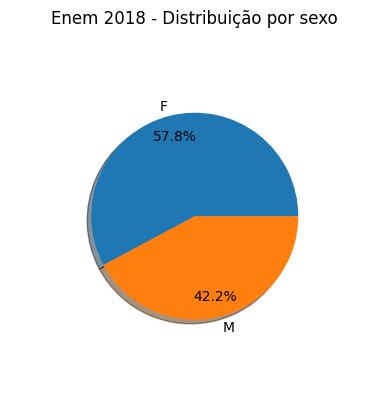

In [16]:
plota_grafico_pizza(dados_enem_2018, 'TP_SEXO', ['F', 'M'], 'Enem 2018 - Distribuição por sexo')

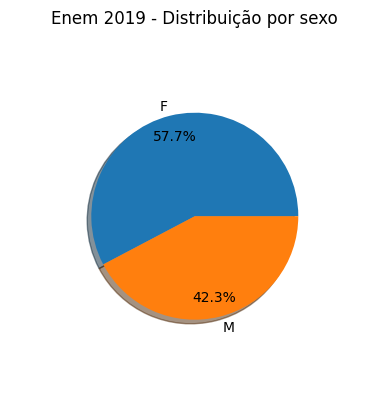

In [17]:
plota_grafico_pizza(dados_enem_2019, 'TP_SEXO', ['F', 'M'], 'Enem 2019 - Distribuição por sexo')

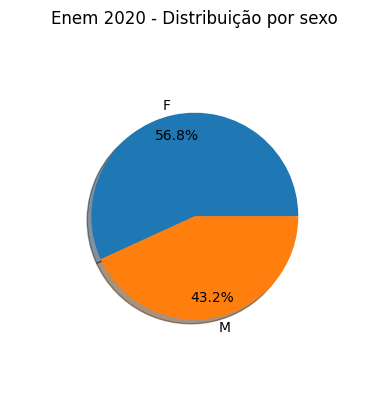

In [18]:
plota_grafico_pizza(dados_enem_2020, 'TP_SEXO', ['F', 'M'], 'Enem 2020 - Distribuição por sexo')

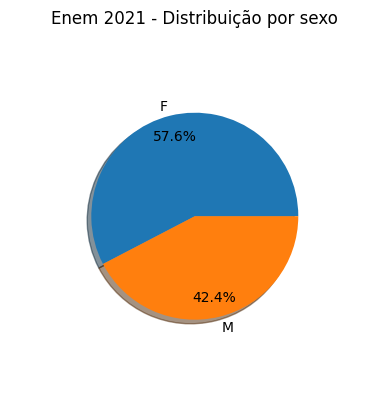

In [19]:
plota_grafico_pizza(dados_enem_2021, 'TP_SEXO', ['F', 'M'], 'Enem 2021 - Distribuição por sexo')

#### 3.2. Número de participantes por Raça

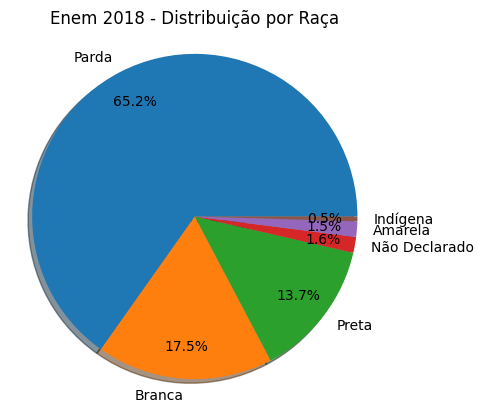

In [20]:
rotulos = ['Parda', 'Branca', 'Preta', 'Não Declarado', 'Amarela', 'Indígena']
plota_grafico_pizza(dados_enem_2018, 'TP_COR_RACA', rotulos, 'Enem 2018 - Distribuição por Raça', raio=1.1)

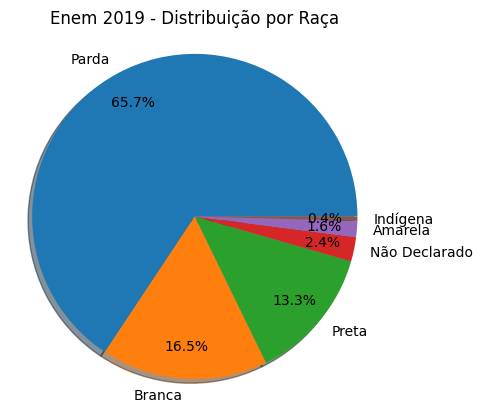

In [21]:
plota_grafico_pizza(dados_enem_2019, 'TP_COR_RACA', rotulos, 'Enem 2019 - Distribuição por Raça', raio=1.1)

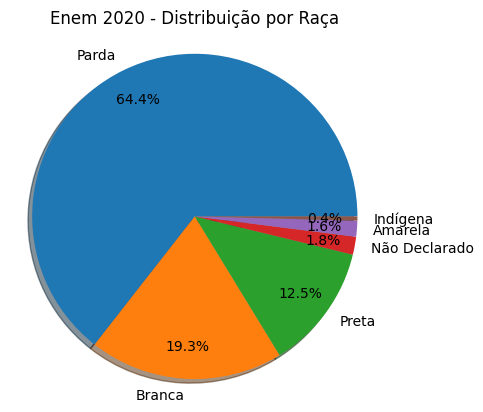

In [22]:
plota_grafico_pizza(dados_enem_2020, 'TP_COR_RACA', rotulos, 'Enem 2020 - Distribuição por Raça', raio=1.1)

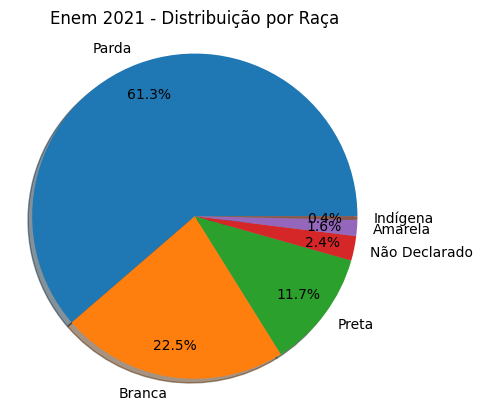

In [23]:
plota_grafico_pizza(dados_enem_2021, 'TP_COR_RACA', rotulos, 'Enem 2021 - Distribuição por Raça', raio=1.1)

#### 3.3. Número de participantes por Dependencia Administrativa

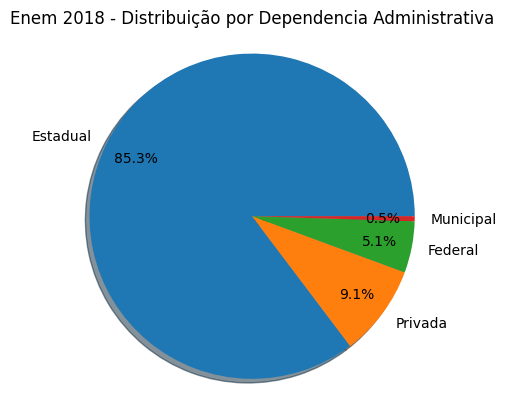

In [24]:
rotulos = ['Estadual', 'Privada', 'Federal', 'Municipal']
plota_grafico_pizza(dados_enem_2018, 'TP_DEPENDENCIA_ADM_ESC', rotulos, 'Enem 2018 - Distribuição por Dependencia Administrativa', raio=1.1)

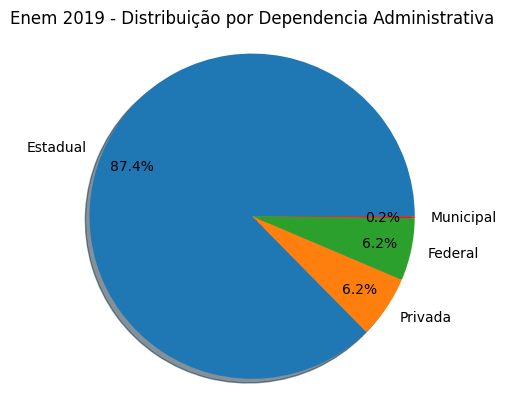

In [25]:
plota_grafico_pizza(dados_enem_2019, 'TP_DEPENDENCIA_ADM_ESC', rotulos, 'Enem 2019 - Distribuição por Dependencia Administrativa', raio=1.1)

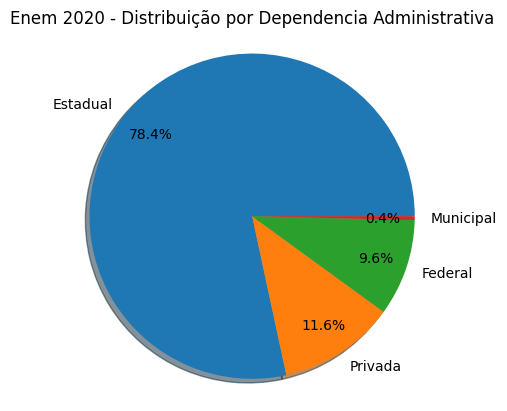

In [26]:
plota_grafico_pizza(dados_enem_2020, 'TP_DEPENDENCIA_ADM_ESC', rotulos, 'Enem 2020 - Distribuição por Dependencia Administrativa', raio=1.1)

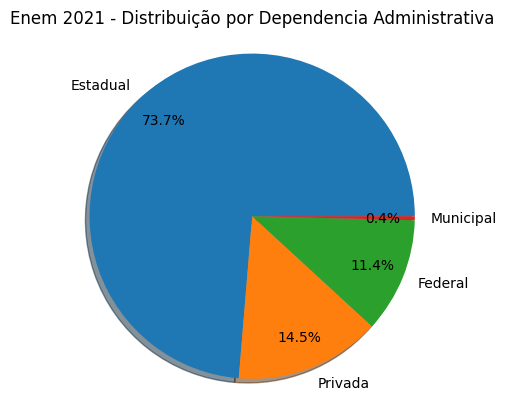

In [27]:
plota_grafico_pizza(dados_enem_2021, 'TP_DEPENDENCIA_ADM_ESC', rotulos, 'Enem 2021 - Distribuição por Dependencia Administrativa', raio=1.1)

#### 3.4. Desempenho do participante em relação à renda

<p>Tarefa 1 - Resumir notas das áreas em uma média</p>
<p>Tarefa 2 - gerar gráfico de disperssão pra ver a relação entre renda e as notas</p>

In [28]:
dados_enem_2018_formatado = dados_enem_2018[colunas].copy()
media_notas = calcula_medias(dados_enem_2018_formatado)
dados_enem_2018_formatado['NU_MEDIA'] = media_notas

In [29]:
dados_enem_2019_formatado = dados_enem_2019[colunas].copy()
media_notas = calcula_medias(dados_enem_2019_formatado)
dados_enem_2019_formatado['NU_MEDIA'] = media_notas

In [30]:
dados_enem_2020_formatado = dados_enem_2020[colunas].copy()
media_notas = calcula_medias(dados_enem_2020_formatado)
dados_enem_2020_formatado['NU_MEDIA'] = media_notas

In [31]:
dados_enem_2021_formatado = dados_enem_2021[colunas].copy()
media_notas = calcula_medias(dados_enem_2021_formatado)
dados_enem_2021_formatado['NU_MEDIA'] = media_notas

In [32]:
colunas = [
        'Q001', 'Q002', 'Q003', 'Q004', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
       'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025']
encodes, cat = cat_to_int(dados_enem_2019_formatado[colunas])

In [33]:
encodes['NU_MEDIA'] = dados_enem_2019_formatado['NU_MEDIA']
dados_amostra = faz_amostragem(encodes)

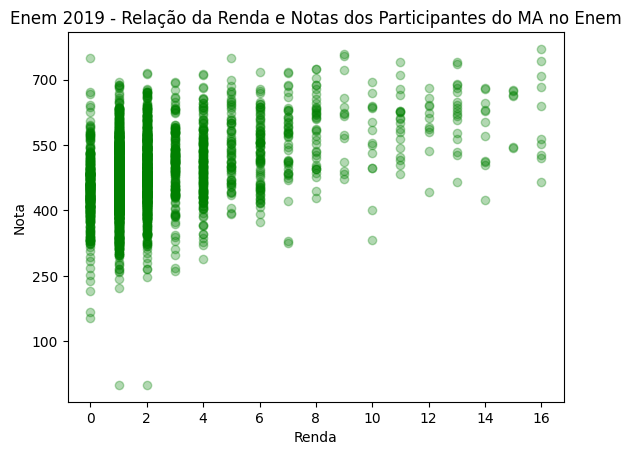

In [46]:
grafico_disperssao(dados_amostra, '2019', titulo='Enem 2019 - Relação da Renda e Notas dos Participantes do MA no Enem')

In [47]:
encodes, cat = cat_to_int(dados_enem_2020_formatado[colunas])
encodes

,Q001,Q002,Q003,Q004,Q006,Q007,Q008,Q009,Q010,Q011,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
357,4,4,1,1,0,0,1,2,1,0,...,1,0,1,4,1,1,1,1,1,1
451,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
463,1,6,2,3,2,0,1,2,0,1,...,0,0,0,1,0,0,2,0,1,1
888,0,1,0,0,1,0,1,2,0,1,...,0,0,0,1,0,0,1,0,0,1
1008,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5781657,7,1,5,1,1,3,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0
5781748,7,3,1,1,1,0,1,2,0,0,...,0,0,0,1,1,0,2,0,0,1
5782098,3,3,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5782987,3,3,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [48]:
encodes['NU_MEDIA'] = dados_enem_2020_formatado['NU_MEDIA']
dados_amostra = faz_amostragem(encodes)

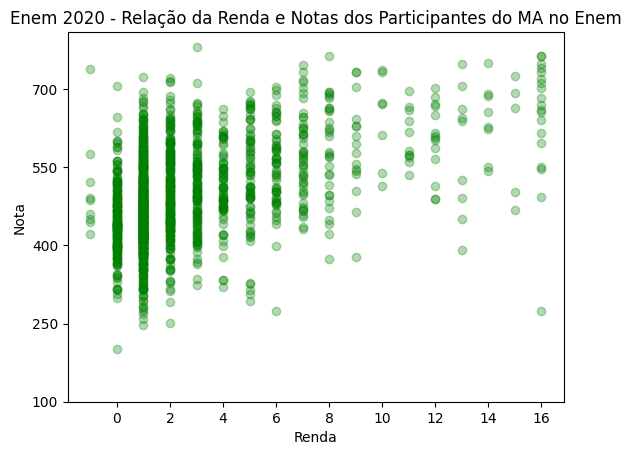

In [49]:
grafico_disperssao(dados_amostra, '2020', titulo='Enem 2020 - Relação da Renda e Notas dos Participantes do MA no Enem')

#### 3.5. Principais correlações com a Média do Participante

In [50]:
colunas = ['Q001', 'Q002', 'Q006', 'Q019',
           'Q022', 'Q024', 'Q025']
correlacoes_ano(dados_enem_2018_formatado, colunas)

NU_MEDIA    1.000000
Q006        0.441689
Q024        0.373892
Q025        0.311858
Q022        0.294228
Q019        0.276585
Q002        0.274398
Q001        0.208211
Name: NU_MEDIA, dtype: float64

In [102]:
correlacoes_ano(dados_enem_2019_formatado, colunas)

NU_MEDIA    1.000000
Q006        0.408438
Q024        0.341185
Q025        0.263169
Q022        0.260838
Q002        0.252967
Q019        0.248000
Q001        0.180652
Name: NU_MEDIA, dtype: float64

In [103]:
correlacoes_ano(dados_enem_2020_formatado, colunas)

NU_MEDIA    1.000000
Q006        0.476391
Q024        0.422142
Q022        0.322102
Q019        0.314683
Q002        0.309182
Q025        0.280468
Q001        0.253217
Name: NU_MEDIA, dtype: float64

In [101]:
correlacoes_ano(dados_enem_2021_formatado, colunas)

NU_MEDIA    1.000000
Q006        0.453948
Q024        0.408976
Q019        0.306444
Q002        0.287977
Q022        0.277477
Q001        0.230525
Q025        0.222368
Name: NU_MEDIA, dtype: float64

#### 3.6. Renda Familiar e Média do Participante

##### Microdados Enem 2018

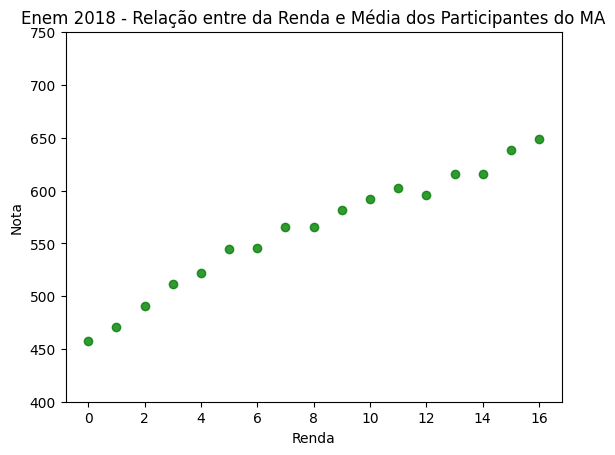

In [130]:
encodes, cat = cat_to_int(dados_enem_2018_formatado[colunas])

tb_media_por_renda = agrupar_por_atributo(encodes, dados_enem_2018_formatado, 'Q006')
tb_media_por_renda['Q006'] = list(range(17))
grafico_disperssao(tb_media_por_renda, '2018', titulo='Enem 2018 - Relação entre da Renda e Média dos Participantes do MA', transparencia=0.8)

##### Microdados Enem 2019

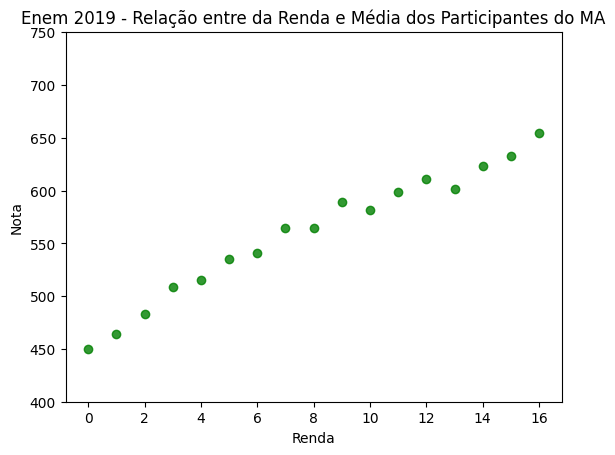

In [135]:
encodes, cat = cat_to_int(dados_enem_2019_formatado[colunas])

tb_media_por_renda = agrupar_por_atributo(encodes, dados_enem_2019_formatado, 'Q006')
tb_media_por_renda['Q006'] = list(range(17))
grafico_disperssao(tb_media_por_renda, '2019', titulo='Enem 2019 - Relação entre da Renda e Média dos Participantes do MA', transparencia=0.8)

##### Microdados Enem 2020

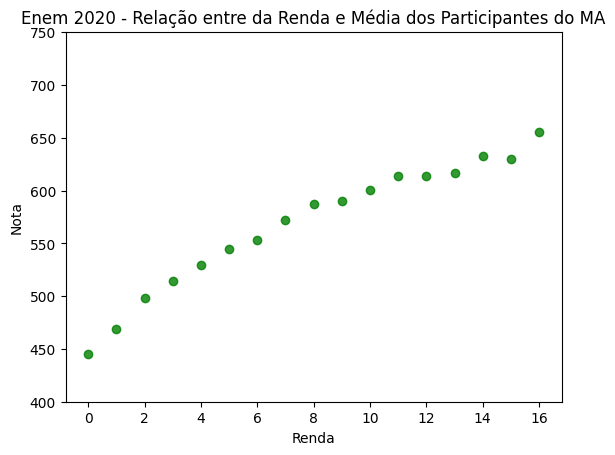

In [136]:
encodes, cat = cat_to_int(dados_enem_2020_formatado[colunas])

tb_media_por_renda = agrupar_por_atributo(encodes, dados_enem_2020_formatado, 'Q006')
tb_media_por_renda.drop([-1], inplace=True)
tb_media_por_renda['Q006'] = list(range(17))
grafico_disperssao(tb_media_por_renda, '2020', titulo='Enem 2020 - Relação entre da Renda e Média dos Participantes do MA', transparencia=0.8)

##### Microdados Enem 2021

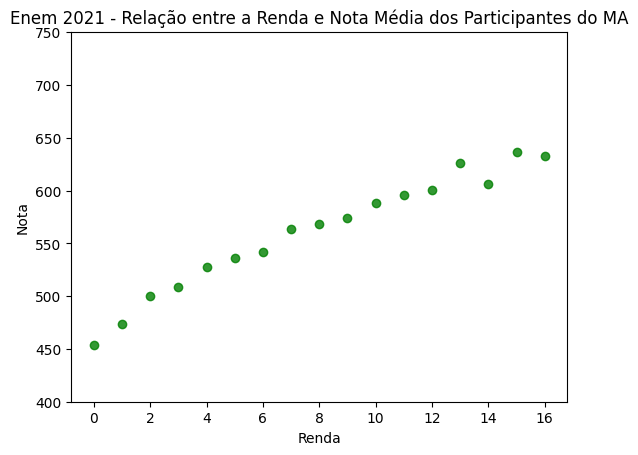

In [137]:
encodes, cat = cat_to_int(dados_enem_2021_formatado[colunas])

tb_media_por_renda = agrupar_por_atributo(encodes, dados_enem_2021_formatado, 'Q006')
tb_media_por_renda['Q006'] = list(range(17))
grafico_disperssao(tb_media_por_renda, '2021', titulo='Enem 2021 - Relação entre a Renda e Nota Média dos Participantes do MA', transparencia=0.8)

#### 3.7. Desempenho do participante em relação a dependencia administrativa da escola

In [79]:
colunas = ['Q001', 'Q002', 'Q003', 'Q004',
       'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
       'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025']

##### Microdados Enem 2018

Text(0, 0.5, 'Notas')

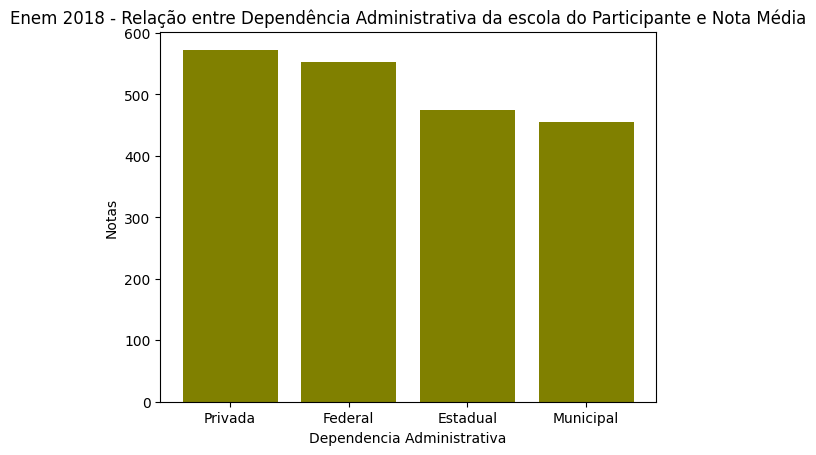

In [149]:
encodes, cat = cat_to_int(dados_enem_2018_formatado[colunas])

tb = agrupar_por_atributo(encodes, dados_enem_2018_formatado, 'TP_DEPENDENCIA_ADM_ESC').sort_values(by='NU_MEDIA', ascending=False)
medias = tb['NU_MEDIA']
dependencias = ['Privada', 'Federal', 'Estadual', 'Municipal']
pyplot.bar(dependencias, medias, color='olive')
pyplot.title('Enem 2018 - Relação entre Dependência Administrativa da escola do Participante e Nota Média')
pyplot.xlabel('Dependencia Administrativa')
pyplot.ylabel('Notas')

##### Microdados Enem 2019

([<matplotlib.axis.YTick at 0x16dba3cca30>,
 [Text(0, 0, '0'),
  Text(0, 50, '50'),
  Text(0, 100, '100'),
  Text(0, 150, '150'),
  Text(0, 200, '200'),
  Text(0, 250, '250'),
  Text(0, 300, '300'),
  Text(0, 350, '350'),
  Text(0, 400, '400'),
  Text(0, 450, '450'),
  Text(0, 500, '500'),
  Text(0, 550, '550'),
  Text(0, 600, '600'),
  Text(0, 650, '650')])

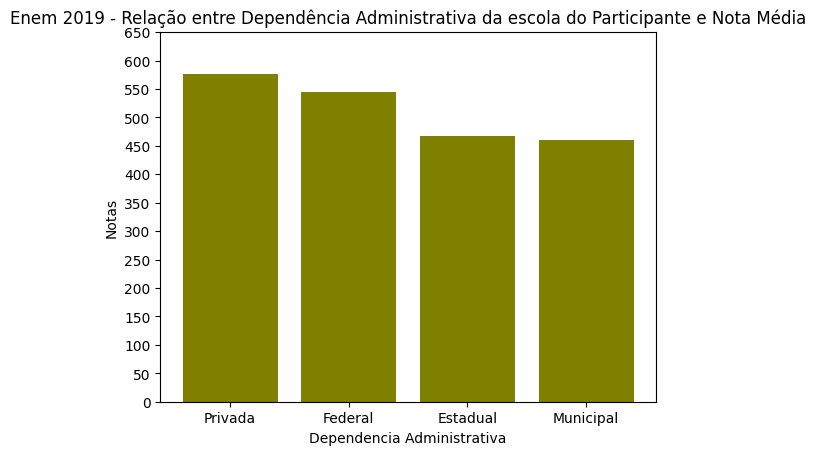

In [157]:
encodes, cat = cat_to_int(dados_enem_2019_formatado[colunas])

tb = agrupar_por_atributo(encodes, dados_enem_2019_formatado, 'TP_DEPENDENCIA_ADM_ESC').sort_values(by='NU_MEDIA', ascending=False)
medias = tb['NU_MEDIA']
dependencias = ['Privada', 'Federal', 'Estadual', 'Municipal']
pyplot.bar(dependencias, medias, color='olive')
pyplot.title('Enem 2019 - Relação entre Dependência Administrativa da escola do Participante e Nota Média')
pyplot.xlabel('Dependencia Administrativa')
pyplot.ylabel('Notas')
pyplot.yticks(np.arange(0, 700, 50))


##### Microdados Enem 2020

([<matplotlib.axis.YTick at 0x16e5948fb80>,
 [Text(0, 0, '0'),
  Text(0, 50, '50'),
  Text(0, 100, '100'),
  Text(0, 150, '150'),
  Text(0, 200, '200'),
  Text(0, 250, '250'),
  Text(0, 300, '300'),
  Text(0, 350, '350'),
  Text(0, 400, '400'),
  Text(0, 450, '450'),
  Text(0, 500, '500'),
  Text(0, 550, '550'),
  Text(0, 600, '600'),
  Text(0, 650, '650')])

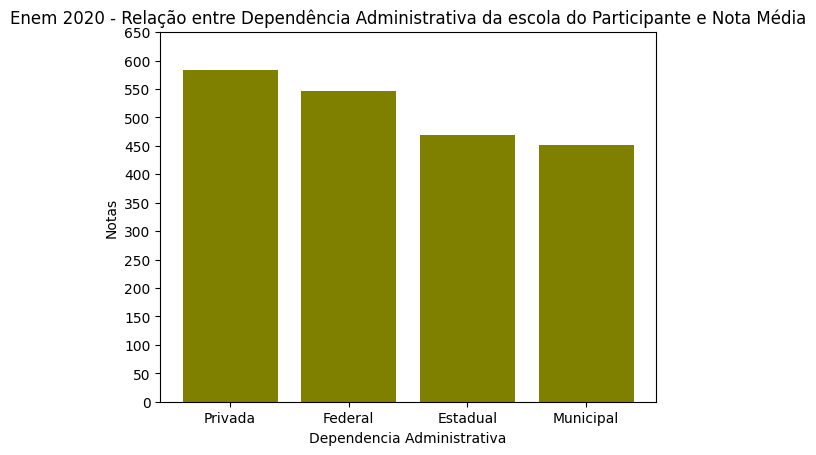

In [158]:
encodes, cat = cat_to_int(dados_enem_2020_formatado[colunas])

tb = agrupar_por_atributo(encodes, dados_enem_2020_formatado, 'TP_DEPENDENCIA_ADM_ESC').sort_values(by='NU_MEDIA', ascending=False)
medias = tb['NU_MEDIA']
dependencias = ['Privada', 'Federal', 'Estadual', 'Municipal']
pyplot.bar(dependencias, medias, color='olive')
pyplot.title('Enem 2020 - Relação entre Dependência Administrativa da escola do Participante e Nota Média')
pyplot.xlabel('Dependencia Administrativa')
pyplot.ylabel('Notas')
pyplot.yticks(np.arange(0, 700, 50))


##### Microdados Enem 2021

([<matplotlib.axis.YTick at 0x16dd46a2eb0>,
 [Text(0, 0, '0'),
  Text(0, 50, '50'),
  Text(0, 100, '100'),
  Text(0, 150, '150'),
  Text(0, 200, '200'),
  Text(0, 250, '250'),
  Text(0, 300, '300'),
  Text(0, 350, '350'),
  Text(0, 400, '400'),
  Text(0, 450, '450'),
  Text(0, 500, '500'),
  Text(0, 550, '550'),
  Text(0, 600, '600'),
  Text(0, 650, '650')])

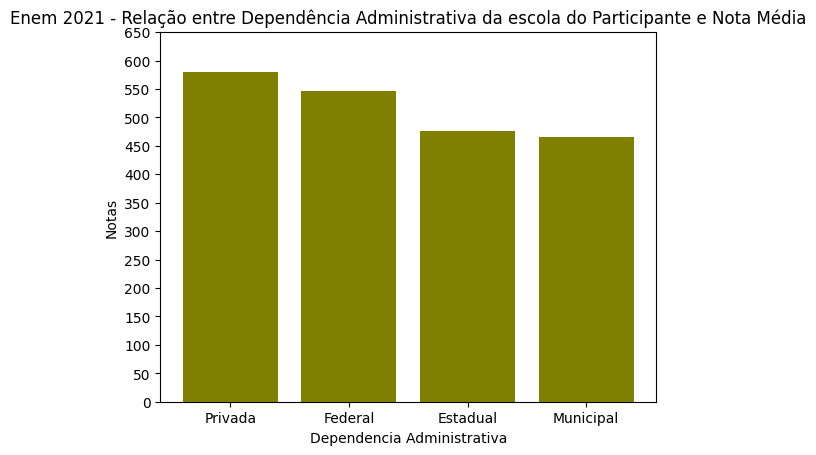

In [159]:
encodes, cat = cat_to_int(dados_enem_2021_formatado[colunas])

tb = agrupar_por_atributo(encodes, dados_enem_2021_formatado, 'TP_DEPENDENCIA_ADM_ESC').sort_values(by='NU_MEDIA', ascending=False)
medias = tb['NU_MEDIA']
dependencias = ['Privada', 'Federal', 'Estadual', 'Municipal']
pyplot.bar(dependencias, medias, color='olive')
pyplot.title('Enem 2021 - Relação entre Dependência Administrativa da escola do Participante e Nota Média')
pyplot.xlabel('Dependencia Administrativa')
pyplot.ylabel('Notas')
pyplot.yticks(np.arange(0, 700, 50))


### 4. Avaliação da Qualidade dos Dados

#### Microdados do Enem - Visão Geral

1. Formato dos datasets: 
   * Problema:
     * Uma das principais variáveis norteadoras, a média geral dos candidatos, não vem na base de dados;
     * A maioria dos valores das variáveis do questionário socieconomico estão como valores categóricos, o que impossibilita algumas manipulações em um primeiro momento;
   * Possível solução:
     * Criar uma variável para a média geral dos candidados à partir das outras variáveis das áreas de conhecimento. 
     * Converter os valores categóricos em valores numéricos. 

2. Tamanho dos datasets: 
    * Problema:
        * Impossibilidade de carregar completamente o dataset em virtude da quantidade de espaço em memória requerida.
    * Possível solução
        * Carregar apenas as colunas mais importantes ou realizar uma amostragem nos dados.